In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import preprocessing

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

In [2]:
data = pd.read_csv('./diabetes.csv')
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12      

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# features_name = ['BMI','Pregnancies','BloodPressure']
# for f in features_name:
#     data = data[(True^data[f].isin([0]))]
# data.describe()
# data.shape

data['BMI'].replace(0,np.nan)

#是否有空缺值
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

单变量分析

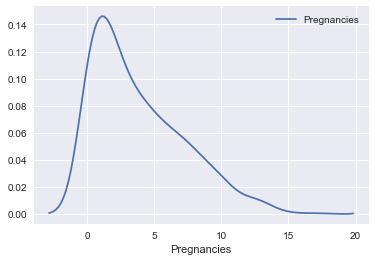

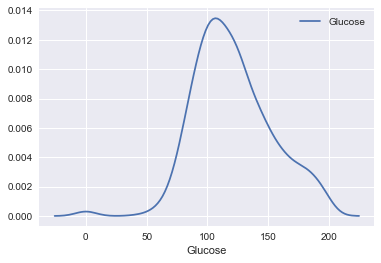

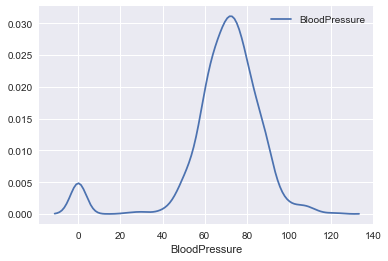

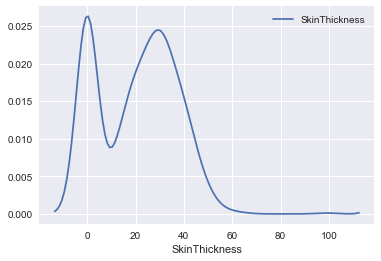

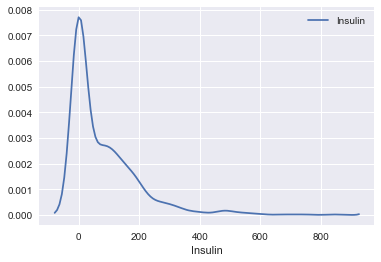

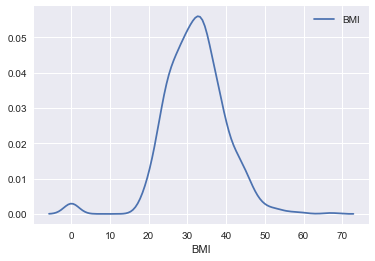

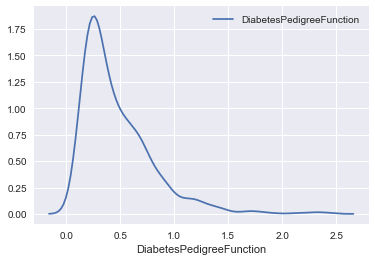

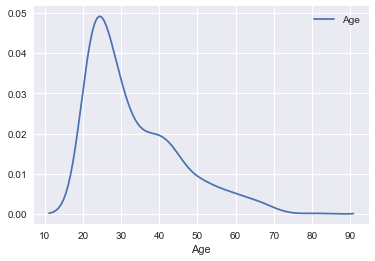

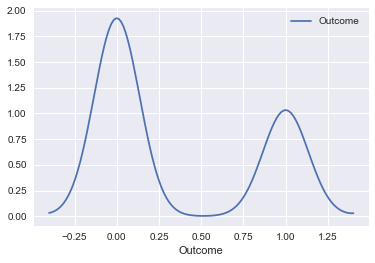

In [7]:
# 特征名
data_cols = data.columns

for col in data_cols:
    sns.kdeplot(data[col])   #这个的直方图无意义
    plt.xlabel(col)
    plt.show()

预测值与特征之间关系

In [8]:
data_corr = data.corr().abs() #相关性矩阵

size = data_corr.shape[1] # for上界
features_name = list(data.columns) # 相关性矩阵特征名
threshold = 0.6 # 相关性分界线

data_corr_list = [] # 相关性大小排序list


for i in range(size):
    for j in range(i+1, size): # 对称矩阵,取一半
        data_corr_list.append([data_corr.iloc[i,j], i, j])
        
# 按相关性大小进行排序
data_corr_list = sorted(data_corr_list,key=lambda x:-x[0])

# 输出相关性大于threshold的特征
for v,i,j in data_corr_list:
    if v > threshold:
        print("%3.3f is %s and %s" % (v,features_name[i],features_name[j]))

# nothing print out. 没有很高相关性的特征

训练数据与测试数据分割

In [9]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 从原始数据中分离输入特征x和输出y
y = data['Outcome'].values
X = data.drop('Outcome', axis = 1)

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape, X_test.shape

((614, 8), (154, 8))

数据预处理

In [10]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

模型训练

In [11]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [12]:
#用train_test_split估计模型性能
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.33,random_state = 0)

正则化的logistic regression以及参数调优,使用GridSearchCV进行参数调优

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [14]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([ 0.00077872,  0.00092368,  0.00058737,  0.00062189,  0.00059409,
         0.00064678,  0.00068259,  0.00061445,  0.00060463,  0.00057912,
         0.00061078,  0.00058751,  0.00060616,  0.00061355]),
 'mean_score_time': array([ 0.00079417,  0.00085244,  0.00065885,  0.00053601,  0.00050406,
         0.00050216,  0.00049043,  0.00048008,  0.00045428,  0.00046787,
         0.00045362,  0.00045619,  0.00045462,  0.00045528]),
 'mean_test_score': array([-0.69314718, -0.64214833, -0.6721329 , -0.52844007, -0.48658965,
        -0.47999943, -0.48043474, -0.48017599, -0.48090477, -0.48086932,
        -0.48095211, -0.48095123, -0.48095571, -0.48095956]),
 'mean_train_score': array([-0.69314718, -0.6412946 , -0.67079105, -0.52380684, -0.47502407,
        -0.46674403, -0.46228782, -0.46214818, -0.46206767, -0.46206619,
        -0.46206531, -0.4620653 , -0.46206529, -0.46206529]),
 'param_C': masked_array(data = [0.001 0.001 0.01 0.01 0.1 0.1 1 1 10 10 100 100 1000 1000],


In [15]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.479999434937
{'C': 0.1, 'penalty': 'l2'}


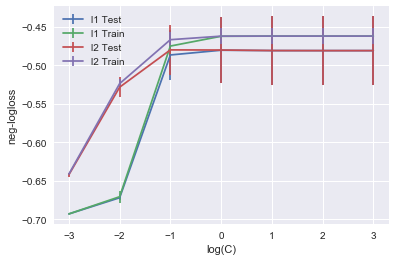

In [16]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    plt.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.savefig('LogisticGridSearchCV_C.png' )

plt.show()

测试

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 

   
# training LR
LR = LogisticRegression(penalty='l2', C=0.1,class_weight ='balanced')
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
# make class predictions for the testing set
y_pred_class = LR.predict(X_test)

In [19]:
# calculate accuracy
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.77922077922077926

In [20]:
metrics.classification_report(y_test, y_pred_class)

'             precision    recall  f1-score   support\n\n          0       0.83      0.83      0.83        99\n          1       0.69      0.69      0.69        55\n\navg / total       0.78      0.78      0.78       154\n'

In [21]:
metrics.f1_score(y_test, y_pred_class)

0.69090909090909092

SVM调优

In [22]:
from sklearn.svm import LinearSVC

In [23]:
def fit_grid_point_linear(C, X_train, y_train, X_val, y_val):
    
    
    LSVC =  LinearSVC(C = C, class_weight ='balanced')
    LSVC = LSVC.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy_test = LSVC.score(X_val, y_val)
    accuracy_train = LSVC.score(X_train, y_train)
    
    print("accuracy on test: %f and on train: %f with C = %f"%(accuracy_test, accuracy_train, C) )
    return accuracy_test

In [24]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
# penaltys = ['l1', 'l2']

accuracy_s = []
for i, oneC in enumerate(C_s):
#     for j, penalty in enumerate(penaltys):
    tmp = fit_grid_point_linear(oneC, X_train_part, y_train_part, X_val, y_val)
    accuracy_s.append(tmp)

accuracy on test: 0.730583 and on train: 0.767327 with C = 0.010000
accuracy on test: 0.733010 and on train: 0.742574 with C = 0.100000
accuracy on test: 0.733010 and on train: 0.742574 with C = 1.000000
accuracy on test: 0.733010 and on train: 0.742574 with C = 10.000000
accuracy on test: 0.703883 and on train: 0.717822 with C = 100.000000


In [25]:
LSVC =  LinearSVC(C = 10, class_weight ='balanced')
LSVC = LSVC.fit(X_train, y_train)
    
# 在校验集上返回accuracy
accuracy_test = LSVC.score(X_test, y_test)
accuracy_train = LSVC.score(X_train, y_train)
accuracy_test, accuracy_train

(0.75974025974025972, 0.76221498371335505)

RBF核SVM正则调优

In [26]:
from sklearn.svm import SVC

In [27]:
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma, class_weight ='balanced')
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    accuracy_train = SVC3.score(X_train, y_train)
    
    print("accuracy on test: %f and on train: %f with C = %f and gamma = %f"%(accuracy, accuracy_train, C, gamma) )
    return accuracy

In [28]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train_part, y_train_part, X_val, y_val)
        accuracy_s.append(tmp)

accuracy on test: 0.645631 and on train: 0.668317 with C = 0.010000 and gamma = 0.010000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.010000 and gamma = 0.100000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.010000 and gamma = 1.000000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.010000 and gamma = 10.000000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.010000 and gamma = 100.000000
accuracy on test: 0.735437 and on train: 0.762376 with C = 0.100000 and gamma = 0.010000
accuracy on test: 0.694175 and on train: 0.688119 with C = 0.100000 and gamma = 0.100000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.100000 and gamma = 1.000000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.100000 and gamma = 10.000000
accuracy on test: 0.645631 and on train: 0.668317 with C = 0.100000 and gamma = 100.000000
accuracy on test: 0.728155 and on train: 0.742574 with C = 1.000000 and gamma = 0.010000
accuracy on tes

使用最佳参数，训练并测试

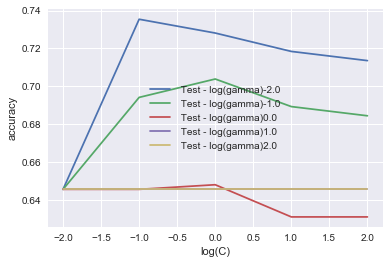

In [29]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    plt.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))

plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('RBF_SVM_Rent.png' )

plt.show()

In [30]:
SVC3 =  SVC( C = 15, kernel='rbf', gamma = 0.01, class_weight ='balanced')
SVC3 = SVC3.fit(X_train, y_train)
    
# 在校验集上返回accuracy
accuracy_test = SVC3.score(X_test, y_test)
accuracy_train = SVC3.score(X_train, y_train)
accuracy_test, accuracy_train

(0.79220779220779225, 0.7719869706840391)